In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

from itertools import product
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
import PIL

/Users/lumi/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1.Kernel density estimation (KDE). You will use KDE on synthetic data to observe the effect of window width. Use Python or any language of your choice.
Generate 100 samples, xi, from the two-component mixture distribution
Under the density (1), the samples xi are from a mixture of two scalar Gaussians with
the same variance.

Using the samples from part (a), compute a density estimate pˆ(x) using the Gaussian kernel with window width h = 0.5. Plot pˆ(x) and p(x) together. You can use any built-in KDE estimation routine in whichever language you are using.

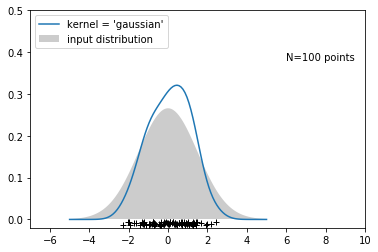

In [93]:
N = 100
X = (0.6 * np.random.normal(-2, 1.5, N) + 0.4 * np.random.normal(3, 1.5, N))[:, np.newaxis]
X_plot = np.linspace(-5, 5, 100)[:, np.newaxis]


true_dens = (norm(0, 1.5).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-7, 10)
ax.set_ylim(-0.02, 0.5)
plt.show()

Re-do parts (a) and (b) with h = 2 and h = 0.1. Which estimate is over-fit and which is under-fit?

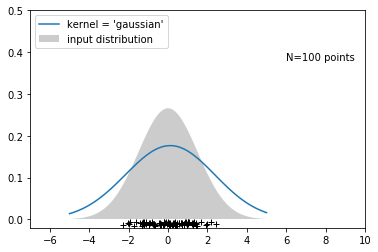

In [94]:
#h=2
fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian']:
    kde = KernelDensity(kernel=kernel, bandwidth=2).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-7, 10)
ax.set_ylim(-0.02, 0.5)
plt.show()

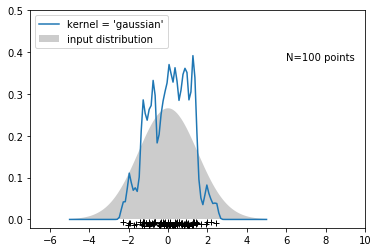

In [95]:
#h=0.1
fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.1).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-7, 10)
ax.set_ylim(-0.02, 0.5)
plt.show()

h = 2 is underfit and h = 0.1 is overfit

3.
K nearest neighbors (KNN). You will use KNN on synthetic data for classification. Use Python or the language of your choice; you may use any built-in commands that are available. An example using Python is here:
http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
The synthetic data will be of the form (x,y) where x ∈ R2 and y = 0,1,2. So the data has three classes and x has dimension d = 2. For each class j = 0, 1, 2, the data x is Gaussian with mean μj and covariance Sj given by
  0.5 0   μ0=[0,0], S0= 0 0.5 ,
  0.5 0   μ1=[1,2], S1= 0 1 ,
  0.5 −0.25  μ2 = [1.5, 0], S2 = −0.25 0.5 .
(a) Generate 900 samples, 300 samples from each class. Plot the generated samples on a scatter plot with different markers for each class.
In Python, you can use np.random.multivariate normal to generate the samples in each class.

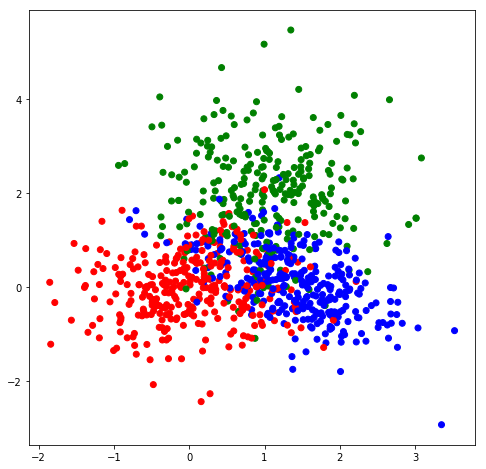

In [214]:
#create sample of three classes
n = 900
mean0 = [0, 0]
cov0 = [[0.5, 0], [0, 0.5]]
mean1 = [1, 2]
cov1 = [[0.5, 0], [0, 1]]
mean2 = [1.5, 0]
cov2 = [[0.5, -0.25], [-0.25, 0.5]]
x = []
y = np.random.randint(0, 3, 900)

for i in range(0, n):
    if y[i] == 0:
        x.append(np.random.multivariate_normal(mean0, cov0))
    elif y[i] == 1:
        x.append(np.random.multivariate_normal(mean1, cov1))
    else:
        x.append(np.random.multivariate_normal(mean2, cov2))

colors = ['red','green','blue']
x = np.asarray(x)

fig = plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))


plt.show()

(b) Shuffle the data and split into 60% (540) training and 40% (360) test samples. For numbers of neighbors k = 2, 5, 15:
• Fit a KNN classifier on the training data. (We will ignore the test data for now.)
• Compute the predicted class labels on a grid of points x = (x0, x1) with x0 ∈ [−3, 3]
and x1 ∈ [−2, 3].
• Use the grid of points to plot the decision regions for each class.
You should see that as k increases, the decision regions become more smooth. In Python,
you can use the np.meshgrid and plt.contourf commands.

With 2 nearest neighbors, a grid of points x = (x0, x1) is classified in class [1 1]
With 5 nearest neighbors, a grid of points x = (x0, x1) is classified in class [0 1]
With 15 nearest neighbors, a grid of points x = (x0, x1) is classified in class [1 1]


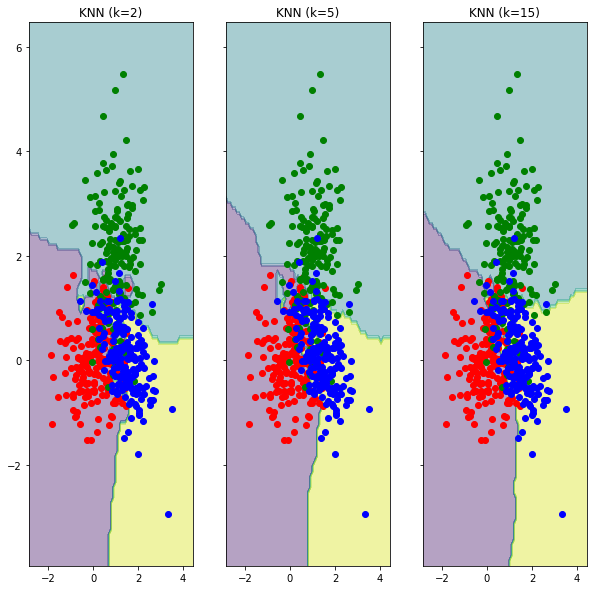

In [221]:
#training/test data

xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.4)


#knn classifier
clf2 = KNeighborsClassifier(n_neighbors=2)
clf5 = KNeighborsClassifier(n_neighbors=5)
clf15 = KNeighborsClassifier(n_neighbors=15)

clf2.fit(xtr, ytr)
clf5.fit(xtr, ytr)
clf15.fit(xtr, ytr)

#compute the predicted class labels on a grid of points x = (x0, x1) with x0 ∈ [−3, 3] and x1 ∈ [−2, 3].
xb = ([-3, 3], [-2, 3])
yb2 = clf2.predict(xb)
print('With 2 nearest neighbors, a grid of points x = (x0, x1) is classified in class', yb2)
yb5 = clf5.predict(xb)
print('With 5 nearest neighbors, a grid of points x = (x0, x1) is classified in class', yb5)
yb15 = clf15.predict(xb)
print('With 15 nearest neighbors, a grid of points x = (x0, x1) is classified in class', yb15)

#plot decision region
colors = ['red','green','blue']
x_min, x_max = xtr[:, 0].min() - 1, xtr[:, 0].max() + 1
y_min, y_max = xtr[:, 1].min() - 1, xtr[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10, 10))

for idx, clf, tt in zip([0, 1, 2],
                        [clf2, clf5, clf15],
                        ['KNN (k=2)', 'KNN (k=5)','KNN (k=15)']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx].scatter(xtr[ytr == 0, 0],
                      xtr[ytr == 0, 1],
                      c = 'red')
    axarr[idx].scatter(xtr[ytr == 1, 0],
                      xtr[ytr == 1, 1],
                      c = 'green')
    axarr[idx].scatter(xtr[ytr == 2, 0],
                      xtr[ytr == 2, 1],
                      c = 'blue')
    axarr[idx].set_title(tt)

plt.show()


(c) Use cross-validation to find the optimal k. For values of k = 2 to 100, fit a model for each k on the training data and plot the test error. What k results in the minimum test error? (Note test error results may be quite “noisy,” i.e. change significantly with the data shuffling. To get more consistent results, one could use K-fold validation, but you do not need to do that here.)

The optimal number of neighbors is 36


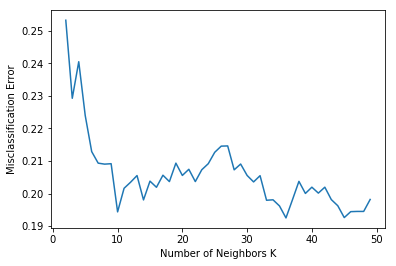

In [228]:
# creating odd list of K for KNN
neighbors = list(range(2,50))


# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, xtr, ytr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is", optimal_k)


# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

##### 6.
Color image segmentation using k-means. (Note: this is not the best method for segmenting images, but it illustrates k-means.) Use Python or any language.
(a) Load and plot the image birds.jpg. The image is on CCLE.

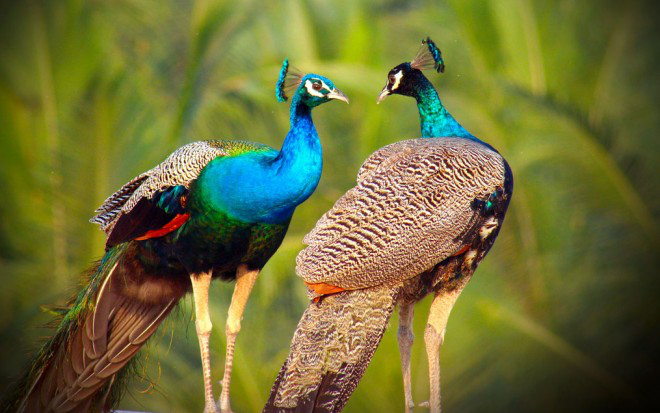

In [2]:
#load image
birds = PIL.Image.open("/Users/lumi/Documents/UCLA/Grad/18 SPRING/c261/hw/birds.jpg")
birds

(b) Instead of having a 3-dimensional array of size nx × ny × 3 for the two image dimensions and three color channels, convert the image to a matrix X of size nxny × 3 so that each of the nxny pixels is stored as a 3×1 vector of intensities for the three color components. (In Python and MATLAB, k-means will expect double precision data. So you will need to convert this matrix from uint8 to floating point.)

In [3]:
# Convert Image to array
birds = np.array(birds, dtype=np.float64) / 255
w, h, d = original_shape = tuple(birds.shape)
assert d == 3
x = np.reshape(birds, (w * h, d))
x.shape

(272580, 3)

(c) Run k-means on the data matrix X with nc = 3 clusters. You can use any built-in command. You do not have to write the algorithm from scratch.

In [4]:
kmeans3 = KMeans(n_clusters = 3).fit(x)

(d) Create a “color-blocked” image, Y, where the RGB values of each pixel are replaced by the RGB value of the cluster center that the pixel belongs to. Reshape this back to an nx × ny × 3 matrix. (In Python and MATLAB, you will also need to round the values and convert back to uint8.) Use the subplot command to plot the original image alongside the color-blocked version. Redo this for nc = 5 clusters.

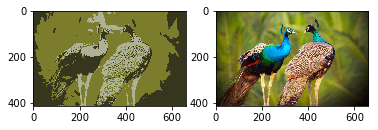

In [13]:
#predict labels for all points
labels3 = kmeans3.predict(x)
codebook3 = kmeans3.cluster_centers_

#Recreate the (compressed) image from the code book & labels
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

birds3 = recreate_image(codebook3, labels3, w, h)

plt.figure(1)
plt.subplot(121)
plt.imshow(birds3)
plt.subplot(122)
plt.imshow(birds)
plt.show()

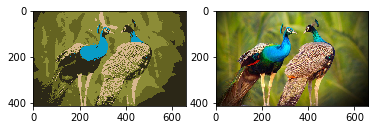

In [12]:
#n = 5 KMeans(n_clusters = 5).fit(x)
labels5 = kmeans5.predict(x)
codebook5 = kmeans5.cluster_centers_
birds5 = recreate_image(codebook5, labels5, w, h)
plt.figure(2)
plt.subplot(121)
plt.imshow(birds5)
plt.subplot(122)
plt.imshow(birds)
plt.show()


(e) In what ways were the image segmentations successful and in what ways were they not?

In both image segmentations are successful because we can recognized the textures, edges and shapes of the image. But nc = 5 provides more details in image segmentations.